#### [Go to index](#Index)

## 2. [Libraries](#Libraries)

In [1]:
#importe les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
%matplotlib inline
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
pd.options.mode.chained_assignment = None
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bertille.lekeufack\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bertille.lekeufack\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


#### [Go to index](#Index)


## 3. [Import Data](#Import-Data)

In [2]:
#Charge les données
df1 =  pd.read_excel('final_210504_tous labels.xlsx',engine='openpyxl')

In [3]:
#Affiche les 5 premières lignes
df= df1.head(1900)
df

,Messages,Nom du fichier,Date de création,Date de modification,catégorie
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,Fri Apr 2 11:22:49 2021,Fri Aug 28 14:20:41 2020,contrat
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,Fri Apr 2 11:22:49 2021,Fri Aug 28 14:20:37 2020,commande de badge
2,"Bonjour, J’ai essayé de faire la modification...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,Fri Apr 2 11:22:49 2021,Mon Aug 31 08:28:36 2020,contrat
3,"Bonjour, merci de me faire un badge avec la gé...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,Fri Apr 2 11:22:49 2021,Wed Aug 19 15:52:02 2020,commande de badge
4,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,Fri Apr 2 11:22:49 2021,Wed Aug 5 11:18:33 2020,no message
...,...,...,...,...,...
1895,"Bonjour,Vous trouverez ci-joints les documents...",nemours-locations@orange.fr.html,Fri Apr 2 11:22:56 2021,Fri Nov 27 09:34:58 2020,contrat
1896,"Bonjour,Veuillez trouver ci-joint votre derniè...",nepasrepondre@mon-expert-en-gestion.fr.html,Fri Apr 2 11:22:56 2021,Mon Nov 9 16:47:30 2020,contrat
1897,"Marlène,Le problème c'est que da notre comptab...",nerea@transportesinsausti.com.html,Fri Apr 2 11:22:56 2021,Wed Nov 4 12:02:40 2020,renseignement facture
1898,"Bonjour,Veuillez trouver ci joint notre liasse...",ngtransagri@live.fr.html,Fri Apr 2 11:22:56 2021,Fri Nov 27 14:04:26 2020,contrat


#### [Go to index](#Index)

## 4. [Exploratory analysis](#Exploratory-analysis)

In [4]:
#Affiche la dimension
df.shape

(1900, 5)

In [5]:
#Affiche les noms de colonne
df.columns

Index(['Messages', 'Nom du fichier', 'Date de création',
       'Date de modification', 'catégorie'],
      dtype='object')

In [7]:
#Supprime les colonnes de date
df = df.drop(['Nom du fichier','Date de création',  'Date de modification'], axis=1)

KeyError: "['Date de création' 'Date de modification'] not found in axis"

In [8]:
#Affiche le nouveau dataset
df

,Messages,Nom du fichier,catégorie
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge
2,"Bonjour, J’ai essayé de faire la modification...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat
3,"Bonjour, merci de me faire un badge avec la gé...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge
4,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,no message
...,...,...,...
1895,"Bonjour,Vous trouverez ci-joints les documents...",nemours-locations@orange.fr.html,contrat
1896,"Bonjour,Veuillez trouver ci-joint votre derniè...",nepasrepondre@mon-expert-en-gestion.fr.html,contrat
1897,"Marlène,Le problème c'est que da notre comptab...",nerea@transportesinsausti.com.html,renseignement facture
1898,"Bonjour,Veuillez trouver ci joint notre liasse...",ngtransagri@live.fr.html,contrat


In [9]:
#vérifie si il y'a des valeurs manquantes
#df.isnull().sum()
df.isnull()

,Messages,Nom du fichier,catégorie
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1895,False,False,False
1896,False,False,False
1897,False,False,False
1898,False,False,False


In [10]:
#Recherche les valeurs nulles dans la colonne message
print(df['Messages'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
1895    False
1896    False
1897    False
1898    False
1899    False
Name: Messages, Length: 1900, dtype: bool


In [11]:
#y'a t'il de valeur manquantes
print(df.isnull().values.any())

True


In [12]:
#df.drop(df.loc[df['Messages']=="No Message"].index,inplace=True)

In [13]:
df.head()

,Messages,Nom du fichier,catégorie
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge
2,"Bonjour, J’ai essayé de faire la modification...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat
3,"Bonjour, merci de me faire un badge avec la gé...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge
4,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,no message


In [14]:
# Nombre total de valeurs manquantes
print(df.isnull().sum().sum())

6


In [15]:
#Supprime toute les colonnes contenant des nan
df.dropna(how='all')

,Messages,Nom du fichier,catégorie
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge
2,"Bonjour, J’ai essayé de faire la modification...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat
3,"Bonjour, merci de me faire un badge avec la gé...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge
4,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,no message
...,...,...,...
1895,"Bonjour,Vous trouverez ci-joints les documents...",nemours-locations@orange.fr.html,contrat
1896,"Bonjour,Veuillez trouver ci-joint votre derniè...",nepasrepondre@mon-expert-en-gestion.fr.html,contrat
1897,"Marlène,Le problème c'est que da notre comptab...",nerea@transportesinsausti.com.html,renseignement facture
1898,"Bonjour,Veuillez trouver ci joint notre liasse...",ngtransagri@live.fr.html,contrat


In [15]:
#Affiche aleatoirement 10 éléments du dataset
df.sample(10)

,Messages,Nom du fichier,catégorie
40,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,no message
301,De : Marlene NTSAMEEnvoyé : jeudi 13 août 202...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,interne Axxès
658,Merci beaucoup.Voici le mandat sepa signer.Nou...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat
1279,Bonjour Désolé pour le retard mais je viens se...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat
1838,"Bonjour, Pourriez-vous m’envoyer par mail un K...",lisa.malton@suez.com.html,contrat
1465,BonjourCarte grise FR-011-NQCordialementMe Jea...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat
815,CHRISTELLE RENARDTRANSPORTS RUBINOClient N° ...,comptabilite@transports-rubino.com.html,réclamation qualité de service
1827,"Bonjour, L’identifiant et le mot de passe que ...",laetitia.denisot@smbtp-fc.fr.html,contrat
976,GROUPE DUCREUXCLIENT : 000004046CONTRAT PL: 00...,m.crozet@ducreux-cfi.com.html,réclamation qualité de service
161,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,no message


In [16]:
df['Messages']=df['Messages'].astype(str)

In [24]:
df['occurence']=0
for i in df.index:
    ss=df['Messages'][i].lower()
    df['occurence'][i]=ss.find("cordialement")

In [25]:
for i in df.index:
    if df['occurence'][i]>0:
        df['Messages'][i]=df['Messages'][i][0:df['occurence'][i]]
    else:
        df['Messages'][i]=df['Messages'][i]

C:\Users\bertille.lekeufack\.conda\envs\stage1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='catégorie', ylabel='count'>

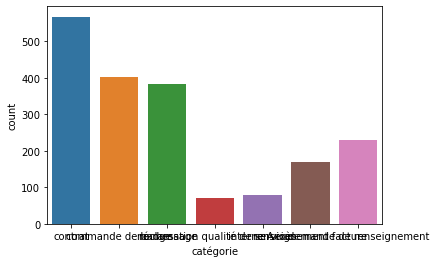

In [31]:
sns.countplot(df.catégorie)

**TRAITER Differemment

In [32]:
#Affiche le contenu de la colonne message
for i in range(10):
    print(df['Messages'][i])

Bonjour,Ci-joint le mandat sepa et le rib.
DANIEL   GUEGANSOCIETE DES TRANSPORTS GUEGANClient N° 14LIEU DIT FONTAINGUY 35290 ST ONEN LA CHAPELLE FRANCEBonjour,En mettant à jour nos badges pour équiper l'ensemble de notre flotte, nous constatons qu'une commande crée le n'est pas validée. Nous n'avons reçu aucune demande de votre part depuis le  du précisant que la commande avait bien été prise en compte.Nous avons passé 2 commandes le Vous trouverez, en pièce jointe, le détail de nos commandes en instance.Pour information, l'ensemble des cartes grises ont bien été fournies lors de la création des véhicules.Nous vous remercions de nous tenir informés de la suite que vous souhaitez y donner.Bien 
 Bonjour, J’ai essayé de faire la modification du badge du EC 418 KS initialement en classe 4 que nous avons vendu et remplacé par une classe 3 immatriculé DW-641-BJ. Le badge est VIA AXXES SAT MANAGER portant le n° 00184.  Vous trouverez ci-joint la carte grise du nouveau camionn pour lequel, no

In [33]:

df['Messages']=df['Messages'].astype(str)

In [34]:
df['contain']=df['Messages'].str.contains('£').map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains('%').map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains('€').map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains('\$').map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains("T&C").map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains("www|WWW").map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains("http|HTTP").map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains("https|HTTPS").map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains("@").map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains("email|Email|EMAIL").map({False:0,True:2})
df['contain']=df['contain']|df['Messages'].str.contains("SMS|sms|FREEPHONE|tel|téléphone").map({False:0,True:3})
df['contain']=df['contain']|df['Messages'].str.contains("\d{11}",regex=True).map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains("\d{10}",regex=True).map({False:0,True:1})
df['contain']=df['contain']|df['Messages'].str.contains("\d{5}",regex=True).map({False:0,True:1})

df.head()

,Messages,Nom du fichier,catégorie,occurence,contain
0,"Bonjour,Ci-joint le mandat sepa et le rib.",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat,42,0
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge,659,1
2,"Bonjour, J’ai essayé de faire la modification...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat,475,3
3,"Bonjour, merci de me faire un badge avec la gé...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge,342,0
4,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,no message,-1,0


In [35]:
df.sample(40)

,Messages,Nom du fichier,catégorie,occurence,contain
1538,"Bonjour,Veuillez trouver ci-joint le bon de co...",administracion@sacytrans.com.html,contrat,79,0
546,"Bonjour,Voici une nouvelle commandeCS-770-APME...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge,1194,1
232,"Bonjour,Nous avons acheté un véhicule d’occasi...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat,526,0
1331,TRANSPORTS ET SERVICES DUPINCHAPORT63190 LEMPT...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge,-1,1
1014,"Bonjour , Ci-joint une demande de réaffectatio...",Morgan.Abribacht@stef.com.html,contrat,62,0
114,Buenos díasHe hablado con los conductores de l...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,réclamation qualité de service,1822,1
46,"Bonjour, Je fais suite à votre demande, veuill...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,renseignement facture,229,0
1248,"Bonjour,Veuillez trouver ci-joint le document ...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat,156,0
1768,BonjourPourriez-vous affecter le boitier du vé...,goetz.willerhof@orange.fr.html,contrat,217,0
1094,"Code client : 32646 Bonjour, Par le présent ,...",sarl@heim.fr.html,commande de badge,434,1


### Suppression des informations personnelles

In [36]:

df['Text']=df['Messages']


In [37]:
tab=[]

for i in df.index:
    
    df['Text'][i]=re.sub('([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', '', str(df['Messages'][i]))#email
    #phone
    df['Text'][i]=re.sub(r"/\d{10}|\+33\d{9}|\+33\s\d{1}\s\d{2}\s\d{2}\s\d{2}\s\d{2}|\d{2}\s\d{2}\s\d{2}\s\d{2}\s\d{2}/g",' ',str(df['Text'][i]))#phone francais
    df['Text'][i]=re.sub(r'(^(\+33 |0)[1-6]{1}(([0-9]{2}){4})|((\s[0-9]{2}){4})|((-[0-9]{2}){4})$)','',str(df['Text'][i]))
    df['Text'][i]=re.sub("((?:\+\d{2}[-\.\s]??|\d{4}[-\.\s]??)?(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}))",'', str(df['Text'][i]))#phone
    df['Text'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}','',str(df['Text'][i]))
    df['Text'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]','',str(df['Text'][i]))
    df['Text'][i]=re.sub('\(?\d{1}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]','',str(df['Text'][i]))
    df['Text'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{5}[-.\s]?\d{3}','',str(df['Text'][i]))
    df['Text'][i]=re.sub('\(?\d{1}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{3}','',str(df['Text'][i]))
    df['Text'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{3}[-.\s]?\d{3}[-.\s]?\d{3}','',str(df['Text'][i]))
    #Emoji
    emoji= re.compile(u'['u'\U0001F300-\U0001F64F'u'\U0001F680-\U0001F6FF'u'\u2600-\u26FF\u2700-\u27BF]+', re.UNICODE)
    df['Text'][i]=re.sub(emoji,' ',str(df['Text'][i]))
    #text
    df['Text'][i]= df['Text'][i].replace("Avant d\'imprimer cet e-mail, réfléchissez à l\'impact sur l\'environnementBefore you print this mail, think about the impact on the environment",'')
    dele = ["Mail:","Email:","e-mail","Email : ","mail","Tél : +","Fax : +","tél.: + ()","port.: + () ","fax.: + ()"]
    #df['Text'][i]= df['Text'][i].replace(dele,'')
    df['Text'][i]= df['Text'][i].replace("Mail:",'')
    df['Text'][i]= df['Text'][i].replace("Email:",'')
    df['Text'][i]= df['Text'][i].replace("E-mail",'')
    df['Text'][i]= df['Text'][i].replace("Email : ",'')
    df['Text'][i]= df['Text'][i].replace("mail",'')
    df['Text'][i]=re.sub(r'\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}','',str(df['Text'][i]))
    #df['Text'][i]=re.sub(r'\d+','',str(df['Text'][i]))#Tél : +      Fax : +, tél.: + ()       fax.: + ()      port.: + () 
    df['Text'][i]= re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",'',df['Text'][i])#url
    df['Text'][i]= re.sub('(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})',' ',str(df['Text'][i]))#url www
    df['Text'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.This message and all attached documents (hereafter "the message") are intended for the exclusive attention of its recipients and are confidential. Any use of this message, for which it was not intended, any distribution or any total or partial publication is prohibited unless previously approved.If you receive this message in error, please destroy it and immediately notify the sender thereof.Since communication by Internet is not secure, Group APRR cannot accept any responsibility regarding the contents of this message.',' ',str(df['Text'][i]))
    #df['Text'][i]= re.sub('SCAN <>Cet  a été envoyé par "copieurRICOH" (MP C3004ex).Date de numérisation: 07.08.2020 17:17:25 (+0200)Contacter si besoin :  ','',str(df['Text'][i]))
    df['Text'][i]= re.sub('Ce message est généré automatiquement. Merci de ne pas y répondre.',' ',str(df['Text'][i]))
    df['Text'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.This message and all attached documents (hereafter "the message") are intended for the exclusive attention of its recipients and are confidential. Any use of this message, for which it was not intended, any distribution or any total or partial publication is prohibited unless previously approved.If you receive this message in error, please destroy it and immediately notify the sender thereof.Since communication by Internet is not secure, Group APRR cannot accept any responsibility regarding the contents of this message.',' ',str(df['Text'][i]))
    df['Text'][i]= re.sub('This message and any attachments are confidential and intended for the named addressee(s) only.If you have received this message in error, please notify immediately the sender, then deletethe message. Any unauthorized modification, edition, use or dissemination is prohibited.The sender shall not be liable for this message if it has been modified, altered, falsified, infectedby a virus or even edited or disseminated without authorization.',' ',str(df['Text'][i]))
    df['Text'][i]= re.sub('This  transmission (message and any attached files) may contain information that is proprietary, privileged and/or confidential to Veolia Environnement and/or its affiliates and is intended exclusively for the person(s) to whom it is addressed. If you are not the intended recipient, please notify the sender by return  and delete all copies of this , including all attachments. Unless expressly authorized, any use, disclosure, publication, retransmission or dissemination of this  and/or of its attachments is strictly prohibited. Ce message electronique et ses fichiers attaches sont strictement confidentiels et peuvent contenir des elements dont Veolia Environnement et/ou l\'une de ses entites affiliees sont proprietaires. Ils sont donc destines a l\'usage de leurs seuls destinataires. Si vous avez recu ce message par erreur, merci de le retourner a son emetteur et de le detruire ainsi que toutes les pieces attachees. L\'utilisation, la divulgation, la publication, la distribution, ou la reproduction non expressement autorisees de ce message et de ses pieces attachees sont interdites.',' ',str(df['Text'][i]))
    df['Text'][i]= re.sub('This  transmission (message and any attached files) may contain information that is proprietary, privileged and/or confidential to Veolia Environnement and/or its affiliates and is intended exclusively for the person(s) to whom it is addressed. If you are not the intended recipient, please notify the sender by return  and delete all copies of this , including all attachments. Unless expressly authorized, any use, disclosure, publication, retransmission or dissemination of this  and/or of its attachments is strictly prohibited.  Ce message electronique et ses fichiers attaches sont strictement confidentiels et peuvent contenir des elements dont Veolia Environnement et/ou l\'une de ses entites affiliees sont proprietaires. Ils sont donc destines a l\'usage de leurs seuls destinataires. Si vous avez recu ce message par erreur, merci de le retourner a son emetteur et de le detruire ainsi que toutes les pieces attachees. L\'utilisation, la divulgation, la publication, la distribution, ou la reproduction non expressement autorisees de ce message et de ses pieces attachees sont interdites.',' ',str(df['Text'][i]))
    df['Text'][i]= re.sub('Le contenu de ce message est strictement réservé à l\'usage exclusif de son destinataire et contient de l\'information privilégiée et confidentielle. Toute lecture, divulgation, distribution ou copie non autorisée de cette communication est formellement interdite. Si vous avez reçu cette communication par erreur, veuillez la détruire immédiatement.','',str(df['Text'][i]))
    df['Text'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.This message and all attached documents (hereafter "the message") are intended for the exclusive attention of its recipients and are confidential. Any use of this message, for which it was not intended, any distribution or any total or partial publication is prohibited unless previously approved.If you receive this message in error, please destroy it and immediately notify the sender thereof.Since communication by Internet is not secure, Group APRR cannot accept any responsibility regarding the contents of this message.',' ',str(df['Text'][i]))
    df['Text'][i]= re.sub('Ce message et les pièces jointes sont confidentiels et établis à l\'attention exclusive de ses destinataires. Toute utilisation ou diffusion, même partielle, non autorisée est interdite. Tout message électronique est susceptible d\'altération. Brink\'s décline toute responsabilité au titre de ce message s\'il a été altéré, déformé ou falsifié. Si vous n\'êtes pas le destinataire de ce message, merci de le détruire et d\'avertir l\'expéditeur. This message and any attachments are confidential and intended solely for the addressees. Any unauthorized use or disclosure, either whole or partial is prohibited. E-s are susceptible to alteration. Brink\'s shall not be liable for the message if altered, changed or falsified. If you are not the intended recipient of this message, please delete it and notify the sender.',' ',str(df['Text'][i]))
    df['Text'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.','',str(df['Text'][i]))
    
    #print(df['Text'][i])

In [38]:
for i in df.index:
    print(df['Text'][i])

Bonjour,Ci-joint le mandat sepa et le rib.
DANIEL   GUEGANSOCIETE DES TRANSPORTS GUEGANClient N° 14LIEU DIT FONTAINGUY 35290 ST ONEN LA CHAPELLE FRANCEBonjour,En mettant à jour nos badges pour équiper l'ensemble de notre flotte, nous constatons qu'une commande crée le n'est pas validée. Nous n'avons reçu aucune demande de votre part depuis le  du précisant que la commande avait bien été prise en compte.Nous avons passé 2 commandes le Vous trouverez, en pièce jointe, le détail de nos commandes en instance.Pour information, l'ensemble des cartes grises ont bien été fournies lors de la création des véhicules.Nous vous remercions de nous tenir informés de la suite que vous souhaitez y donner.Bien 
 Bonjour, J’ai essayé de faire la modification du badge du EC 418 KS initialement en classe 4 que nous avons vendu et remplacé par une classe 3 immatriculé DW-641-BJ. Le badge est VIA AXXES SAT MANAGER portant le n° 00184.  Vous trouverez ci-joint la carte grise du nouveau camionn pour lequel, no

No Message
Bonjour,Il semble qu’il y ait erreur de destinataire : Nous avons reçu 2 badges Réf DK076WERéf FB484SXAlors qu’il ne nous semble pas avoir de commande en cours Merci de nous tenir informé
Bonjour, Le nécessaire a été fait par téléphone hier. Merci.  
Bonjour, Pourriez-vous modifier l’adresse e et le numéro de téléphone enregistrés pour notre compte Client N° 06 svp ? Nous souhaitons recevoir les notifications de factures directement au secrétariat :  Gocel est le PDG du Groupe et n’a pas le temps de gérer l’administratif. Le numéro de téléphone est erroné. Celui à utiliser est : 48 Merci d’avance 
No Message
En cette période...Si vous ne voyez pas ce message correctement, consultez-le en ligne.Bonjour,En cette période de crise sanitaire, prendre soin de ses clients, partenaires et salariés fait partie des priorités de toute entreprise. Avez-vous besoin de masques jetables pour protéger vos clients & collaborateurs ?Nous vous proposons des Masques certifés:- Type 1, 2R et enf

In [39]:
df.head()

,Messages,Nom du fichier,catégorie,occurence,contain,Text
0,"Bonjour,Ci-joint le mandat sepa et le rib.",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat,42,0,"Bonjour,Ci-joint le mandat sepa et le rib."
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge,659,1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...
2,"Bonjour, J’ai essayé de faire la modification...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat,475,3,"Bonjour, J’ai essayé de faire la modification..."
3,"Bonjour, merci de me faire un badge avec la gé...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge,342,0,"Bonjour, merci de me faire un badge avec la gé..."
4,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,no message,-1,0,No Message


In [25]:
df.head(1)

,Messages,Nom du fichier,catégorie,contain,Text
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat,0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord..."


In [40]:
# 4.4 Fonction permettant de nettoyer le texte
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation]) 
    tokens = re.split('\W+', text)#separe les valeurs non alphanumérique 
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [41]:
stopwords = nltk.corpus.stopwords.words('french')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [42]:
df['text_clean'] = df['Text'].apply(lambda x: clean_text(x))

In [43]:
df.sample(10)

,Messages,Nom du fichier,catégorie,occurence,contain,Text,text_clean
1149,"Bonjour, Ne pouvant télécharger le dossier de ...",tpspetit45@wanadoo.fr.html,commande de badge,216,0,"Bonjour, Ne pouvant télécharger le dossier de ...","[bonjour, pouvant, télécharger, dossier, comma..."
629,Demande de badge KM-X/ ! \ Seul un envoi de e...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge,-1,0,Demande de badge KM-X/ ! \ Seul un envoi de e...,"[demande, badge, kmx, seul, envoi, effectué, n..."
1086,"Bonjour, Merci de remettre à jour notre compte...",sandra.garnier@lewis-industrie.fr.html,contrat,306,1,"Bonjour, Merci de remettre à jour notre compte...","[bonjour, merci, remettre, jour, compte, car, ..."
1586,"Bonjour,Mon précédent étant resté sans répons...",bauroux@sarpindustries.fr.html,demande de renseignement,255,0,"Bonjour,Mon précédent étant resté sans répons...","[bonjourmon, précédent, resté, sans, réponse, ..."
1281,"Bonjour, Merci de changer d’immatriculation d...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,contrat,-1,1,"Bonjour, Merci de changer d’immatriculation d...","[, bonjour, merci, changer, immatriculation, b..."
266,"Bonjour,Ci-joint la photocopie de la carte gri...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,commande de badge,71,0,"Bonjour,Ci-joint la photocopie de la carte gri...","[bonjourcijoint, photocopie, carte, grise, com..."
86,"Bonjour,Je suis absente du bureau jusqu'au 28/...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,demande de renseignement,187,0,"Bonjour,Je suis absente du bureau jusqu'au 28/...","[bonjourje, absente, bureau, jusquau, 28082020..."
674,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,no message,-1,0,No Message,"[no, message]"
1795,"Bonjour, Je vous transmets ci-joint la carte g...",j.retailleau@ademi.fr.html,commande de badge,78,0,"Bonjour, Je vous transmets ci-joint la carte g...","[bonjour, transmets, cijoint, carte, grise, de..."
609,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,no message,-1,0,No Message,"[no, message]"


In [44]:
## 4.6 Vectorizing
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
## 4.6.1 converti un document en vecteur de token 
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(df['text_clean'])
print(X_counts.shape)


(1900, 1437)


In [46]:
print(count_vect.get_feature_names())

['', '171220201346lyonaécritbonjournouvellecommandeporte77annuléprécédente', '90ruemauricedelpouysbp39582000montaubantelephone34telecopie57ebonjourveuilleztrouvercijointcartegriserectoversopdfbonneréceptionsincèressalutationstéphanieautocarsbarrièrelyontoenvoyémardi15décembre20200951àstéphaniebonnetobjetredemandebadgeautocarsbarriereclient17bonjourarrivonsouvrirpiècejointepourriezprieenvoyernouveaucartegrisevéhiculeplaîtattente', 'aattentiondirecteurressourceshumainesbonjourmonsieurpriévoicicvainsilettremotivationlettrerecommandationsouhaitantbonnelectureserindatjohan', 'aattentionmdefusterjuliebonjourprietrouverciannexébilan20192019resteécouteamplesrenseignementsbonnejournéebientransportablemenrichardrossettranstouross230placegare01250tossiattél17mail', 'accordmrjeudysouhaitonscommanderbadgecamionft319edcijointboncommandesouhaitonsarrêterbadgecamionimmatriculé196vn0300046merciindiquerprocéduresuivre', 'administraciónenvoyéjeudi23juillet20201253àsanpedroluiscceladioaltanuevodispositivo

In [47]:
X_counts

<1900x1437 sparse matrix of type '<class 'numpy.int64'>'
	with 1900 stored elements in Compressed Sparse Row format>

In [48]:
#Compte le nombre d'occurence de token
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df.head(40)

,,171220201346lyonaécritbonjournouvellecommandeporte77annuléprécédente,90ruemauricedelpouysbp39582000montaubantelephone34telecopie57ebonjourveuilleztrouvercijointcartegriserectoversopdfbonneréceptionsincèressalutationstéphanieautocarsbarrièrelyontoenvoyémardi15décembre20200951àstéphaniebonnetobjetredemandebadgeautocarsbarriereclient17bonjourarrivonsouvrirpiècejointepourriezprieenvoyernouveaucartegrisevéhiculeplaîtattente,aattentiondirecteurressourceshumainesbonjourmonsieurpriévoicicvainsilettremotivationlettrerecommandationsouhaitantbonnelectureserindatjohan,aattentionmdefusterjuliebonjourprietrouverciannexébilan20192019resteécouteamplesrenseignementsbonnejournéebientransportablemenrichardrossettranstouross230placegare01250tossiattél17mail,accordmrjeudysouhaitonscommanderbadgecamionft319edcijointboncommandesouhaitonsarrêterbadgecamionimmatriculé196vn0300046merciindiquerprocéduresuivre,administraciónenvoyéjeudi23juillet20201253àsanpedroluiscceladioaltanuevodispositivoaxxescisternazamudiobuenosdíasluisnecesitábamossolicitaraltanuevodispositivotelepeajeaxxesparasiguientematrículanuestraempresacisternazamudio3451kwtpídeleslosgrandesperosinpagargeolocalizacionsóloválidoparafranciamomentoteadjuntocopiadocumentaciónporeltipomotorcaraasitienenbonificacióngraciassaludosilviamaríngutiérrezmartínezmarcosslctraburgosportugalkm9valladolidcifb8tfnos5522ext102fax87e,adresseminusculereçuchrystèleballélignedirecte44delyonchrystelleballéenvoyélundi16novembre2020152621objetrefactureaxxesbonjourfaissuiteautomatiquevientêtreenvoyéadresseidentifiantmotpassetemporairemodifierdèsprochaineconnexionespaceclientagitmotpassetemporairevalable48hrestantdispositiontoutedemandecomplémentairebien,alattentionaxxesdossiersuivimonsieurrasseloïcréférence351568defe20datelimitepaiement151020suiteavisretransmis240820bonjourmonservicenestchargérecouvrementtitreperceptioncitéobjetnaquunecopietitreperceptionjetransmetsdoncdemandepfcouestserviceaémistitreperceptionencontreseulhabilitérépondredemandejeinvitecontacterdirectementsibesoininformemaintenirrecouvrementpoursuiteséventuellesjerestedispositiontoutrenseignementcomplémentaireutileprierecevoirmonsieursalutationdistinguéeslegallronanronangallpôlegestionpubliqueservicernfproduitsdiverddfipfinistèretelfaxadoptezlécoattitudenimprimezsicestvraimentnécessairemessagetransférésujetbesoinjustificatifdelyonddfipfinistèreproduitsdiverdatevendredi04décembre20201456bonjoursuiteréceptiontitreperceptionpouvezvousmadresserfactureliaisonsommeréclamezmerci,alattentionjuliabonjourcommeconvenuveuilleztrouvercijointmandatprélèvement,...,urgentbonjoursuiteconversationtéléphoniquemercidactiverservicebcartees186kcbadge00167voustrouverezpjcartegrisevéhiculebonneréception,urgentbonsoirmercisuiteentretientéléphoniqueservicemercrediconcernantbadgevéhiculedz199awvoirdocpjcommerecommandéattendujourrencontronstoujoursproblèmeceluiclignotefoistoutéteinttélépéagefonctionnetoutmercivérifierbienvouloirfairenécessaireattenteretourflorencevallerydirectricegénérale50transportvalleryurparcactivitébriqueterie7ruebriqueterie76700gainnevilletél25rchavre60b78siret36050078900050ape4941atvafrlyonenvoyévendredi21août20201354àflorencevalleryccpierricklamaireobjetreaxxesretourbadgesarltransportguerinclient71transportvalleryclient48madamesuitecourrieljourconfirmonsbadgecidessousbienenregistréscommerestituésateliersarltransportguerinnopanimmatriculation00041ac124gw00058bl643qm00108ac124gwtransportvallerynopanimmatriculation00041bj159zj00058bg342me00074bw408lm00090cp528pb00108cp730ad00140bd652ha00157ay067tg00207cc680se00215dc268tx00298ch636vs00363dz197aw00470bj159zj00504bj159zjbadgeresitués30juillet202021août2020encorerengistréscommerestituésafinouvrirréclamationafindemanderremboursementbadgeretournésjuilletfacturéaoûtauriezvouspossibilitéfournirreçuenvoi30juillet21aoûtquantremboursementgarantiecomptesarltransportguerinclient71cellecirestituéeréceptionensemblebadgeatelierremericantavanceattenterestonsdispositiontoutcomplémentinformation,voici,voicidocumentdemandésga

#### [Go to index](#Index)


## 5. [Featuring engineering](#Featuring-engineering)

In [49]:
tfidf_vect = TfidfVectorizer( analyzer=clean_text)

In [50]:
#nombre d'apparition élévé donne un plus grand score
X_tfidf = tfidf_vect.fit_transform(df['text_clean'])
feature_names = tfidf_vect.get_feature_names()
dense = X_tfidf.todense()
denselist=dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2.head()

,,171220201346lyonaécritbonjournouvellecommandeporte77annuléprécédente,90ruemauricedelpouysbp39582000montaubantelephone34telecopie57ebonjourveuilleztrouvercijointcartegriserectoversopdfbonneréceptionsincèressalutationstéphanieautocarsbarrièrelyontoenvoyémardi15décembre20200951àstéphaniebonnetobjetredemandebadgeautocarsbarriereclient17bonjourarrivonsouvrirpiècejointepourriezprieenvoyernouveaucartegrisevéhiculeplaîtattente,aattentiondirecteurressourceshumainesbonjourmonsieurpriévoicicvainsilettremotivationlettrerecommandationsouhaitantbonnelectureserindatjohan,aattentionmdefusterjuliebonjourprietrouverciannexébilan20192019resteécouteamplesrenseignementsbonnejournéebientransportablemenrichardrossettranstouross230placegare01250tossiattél17mail,accordmrjeudysouhaitonscommanderbadgecamionft319edcijointboncommandesouhaitonsarrêterbadgecamionimmatriculé196vn0300046merciindiquerprocéduresuivre,administraciónenvoyéjeudi23juillet20201253àsanpedroluiscceladioaltanuevodispositivoaxxescisternazamudiobuenosdíasluisnecesitábamossolicitaraltanuevodispositivotelepeajeaxxesparasiguientematrículanuestraempresacisternazamudio3451kwtpídeleslosgrandesperosinpagargeolocalizacionsóloválidoparafranciamomentoteadjuntocopiadocumentaciónporeltipomotorcaraasitienenbonificacióngraciassaludosilviamaríngutiérrezmartínezmarcosslctraburgosportugalkm9valladolidcifb8tfnos5522ext102fax87e,adresseminusculereçuchrystèleballélignedirecte44delyonchrystelleballéenvoyélundi16novembre2020152621objetrefactureaxxesbonjourfaissuiteautomatiquevientêtreenvoyéadresseidentifiantmotpassetemporairemodifierdèsprochaineconnexionespaceclientagitmotpassetemporairevalable48hrestantdispositiontoutedemandecomplémentairebien,alattentionaxxesdossiersuivimonsieurrasseloïcréférence351568defe20datelimitepaiement151020suiteavisretransmis240820bonjourmonservicenestchargérecouvrementtitreperceptioncitéobjetnaquunecopietitreperceptionjetransmetsdoncdemandepfcouestserviceaémistitreperceptionencontreseulhabilitérépondredemandejeinvitecontacterdirectementsibesoininformemaintenirrecouvrementpoursuiteséventuellesjerestedispositiontoutrenseignementcomplémentaireutileprierecevoirmonsieursalutationdistinguéeslegallronanronangallpôlegestionpubliqueservicernfproduitsdiverddfipfinistèretelfaxadoptezlécoattitudenimprimezsicestvraimentnécessairemessagetransférésujetbesoinjustificatifdelyonddfipfinistèreproduitsdiverdatevendredi04décembre20201456bonjoursuiteréceptiontitreperceptionpouvezvousmadresserfactureliaisonsommeréclamezmerci,alattentionjuliabonjourcommeconvenuveuilleztrouvercijointmandatprélèvement,...,urgentbonjoursuiteconversationtéléphoniquemercidactiverservicebcartees186kcbadge00167voustrouverezpjcartegrisevéhiculebonneréception,urgentbonsoirmercisuiteentretientéléphoniqueservicemercrediconcernantbadgevéhiculedz199awvoirdocpjcommerecommandéattendujourrencontronstoujoursproblèmeceluiclignotefoistoutéteinttélépéagefonctionnetoutmercivérifierbienvouloirfairenécessaireattenteretourflorencevallerydirectricegénérale50transportvalleryurparcactivitébriqueterie7ruebriqueterie76700gainnevilletél25rchavre60b78siret36050078900050ape4941atvafrlyonenvoyévendredi21août20201354àflorencevalleryccpierricklamaireobjetreaxxesretourbadgesarltransportguerinclient71transportvalleryclient48madamesuitecourrieljourconfirmonsbadgecidessousbienenregistréscommerestituésateliersarltransportguerinnopanimmatriculation00041ac124gw00058bl643qm00108ac124gwtransportvallerynopanimmatriculation00041bj159zj00058bg342me00074bw408lm00090cp528pb00108cp730ad00140bd652ha00157ay067tg00207cc680se00215dc268tx00298ch636vs00363dz197aw00470bj159zj00504bj159zjbadgeresitués30juillet202021août2020encorerengistréscommerestituésafinouvrirréclamationafindemanderremboursementbadgeretournésjuilletfacturéaoûtauriezvouspossibilitéfournirreçuenvoi30juillet21aoûtquantremboursementgarantiecomptesarltransportguerinclient71cellecirestituéeréceptionensemblebadgeatelierremericantavanceattenterestonsdispositiontoutcomplémentinformation,voici,voicidocumentdemandésga

In [51]:
type(df['text_clean'])

pandas.core.series.Series

In [52]:
X=df['Messages'].value_counts()
y=df['catégorie']# message

y.unique()

array(['contrat', 'commande de badge', 'no message',
       'réclamation qualité de service', 'interne Axxès',
       'renseignement facture', 'demande de renseignement'], dtype=object)

In [53]:
# 5.4 Converti en valeurs entière

#print(y)
df['catégorie'] = df['catégorie'].replace({ 'contrat' : 0,'demande de renseignement' : 1,'interne Axxès' : 2 ,'renseignement facture' : 3, 'commande de badge' : 4, 'réclamation qualité de service' : 5,'no message' : 6,'réclamation facture':7,'remplacement badge':8,'réclamation logistique':9,'stef':10,
                                            'amende Belgique':11,'no':12})
df.head(30)

,Messages,Nom du fichier,catégorie,occurence,contain,Text,text_clean
0,"Bonjour,Ci-joint le mandat sepa et le rib.",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,0,42,0,"Bonjour,Ci-joint le mandat sepa et le rib.","[bonjourcijoint, mandat, sepa, rib]"
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,4,659,1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,"[daniel, guegansociete, transport, gueganclien..."
2,"Bonjour, J’ai essayé de faire la modification...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,0,475,3,"Bonjour, J’ai essayé de faire la modification...","[, bonjour, essayé, faire, modification, badge..."
3,"Bonjour, merci de me faire un badge avec la gé...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,4,342,0,"Bonjour, merci de me faire un badge avec la gé...","[bonjour, merci, faire, badge, géolocalisation..."
4,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,6,-1,0,No Message,"[no, message]"
5,"Bonjour, L'appareil 03485 a été attribué au ca...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,5,2222,1,"Bonjour, L'appareil 03485 a été attribué au ca...","[bonjour, lappareil, 03485, a, attribué, camio..."
6,"Bonjour, Je vous envoie ci-joint une demande d...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,4,164,0,"Bonjour, Je vous envoie ci-joint une demande d...","[bonjour, envoie, cijoint, demande, nouveau, b..."
7,Avec les fichiers … Avec toutes mes excuses. B...,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,0,-1,1,Avec les fichiers … Avec toutes mes excuses. B...,"[fichiers, toutes, excuse, bien, sabrina, hour..."
8,"Bonjour,Veuillez trouver ci-jointe la carte gr...",AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,4,62,0,"Bonjour,Veuillez trouver ci-jointe la carte gr...","[bonjourveuillez, trouver, cijointe, carte, gr..."
9,No Message,AAMkAGRiZjFhYjc3LTM2YTctNDE3MC1hODdmLTZhMTEwYm...,6,-1,0,No Message,"[no, message]"


In [54]:
y=df['catégorie']
x=df.drop(['catégorie','Nom du fichier','contain','Text','Messages','occurence'],axis=1)
x

,occurence,text_clean
0,42,"[bonjourcijoint, mandat, sepa, rib]"
1,659,"[daniel, guegansociete, transport, gueganclien..."
2,475,"[, bonjour, essayé, faire, modification, badge..."
3,342,"[bonjour, merci, faire, badge, géolocalisation..."
4,-1,"[no, message]"
...,...,...
1895,148,"[bonjourvous, trouverez, cijoints, document, c..."
1896,110,"[bonjourveuillez, trouver, cijoint, dernière, ..."
1897,224,"[marlènele, problème, cest, da, comptabilité, ..."
1898,55,"[bonjourveuillez, trouver, ci, joint, liasse, ..."


In [55]:
print(x.shape)
print(y.shape)

(1900, 2)
(1900,)


In [56]:
print(x)

      occurence                                         text_clean
0            42                [bonjourcijoint, mandat, sepa, rib]
1           659  [daniel, guegansociete, transport, gueganclien...
2           475  [, bonjour, essayé, faire, modification, badge...
3           342  [bonjour, merci, faire, badge, géolocalisation...
4            -1                                      [no, message]
...         ...                                                ...
1895        148  [bonjourvous, trouverez, cijoints, document, c...
1896        110  [bonjourveuillez, trouver, cijoint, dernière, ...
1897        224  [marlènele, problème, cest, da, comptabilité, ...
1898         55  [bonjourveuillez, trouver, ci, joint, liasse, ...
1899         85  [bonjourveuillez, trouver, cijoint, carte, gri...

[1900 rows x 2 columns]


#### [Go to index](#Index)

## 6. [Split Data for Training](#Split-Data-for-Training)


In [57]:
# Train test split
from sklearn.model_selection import train_test_split

In [58]:
#  Separe les données, test size = 30%
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=0)

In [59]:
# 6.3  Affiche la taille du dataset d'entrainement et de test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1330, 2)
(570, 2)
(1330,)
(570,)


## 7. [Machine learning](#Machine-learning)

## 7. 1. [Machine learning Models: Random Forest](#Machine-learning-Models:-Random-Forest)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [61]:
ClassifierModel = ['Random Forest']

In [62]:
#Initiation du model
rf = RandomForestClassifier(n_estimators=100, n_jobs=5,random_state=0)

In [63]:
#y_test=y_test.astype(int)
y_train=np.array(y_train)
#X_train,X_test,y_train,y_test
X_train=np.array(X_train)
#y_train=y_train.astype(int)

In [64]:
type(X_train)

numpy.ndarray

In [65]:
#Training model
debut = time.time()
rf_model = rf.fit(X_train,y_train)
fin = time.time()
fit_time = (fin-debut)

ValueError: setting an array element with a sequence.

In [66]:
#Testing model
debut = time.time()
y_predRF = rf_model.predict(X_test)
fin = time.time()
pred_time = (fin-debut)


NameError: name 'rf_model' is not defined

In [ ]:
#Affichage de label dans une catégorie


In [ ]:
#calculate accuracy
precision, recall, fscore, train_support = score(y_test, y_predRF, average='micro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3),round((y_predRF==y_test).sum()/len(y_predRF), 3)))

In [ ]:
AccuracyRF = round((y_predRF==y_test).sum()/len(y_predRF),3)
Accuracy = AccuracyRF

In [ ]:
Accuracy

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print('Random Forest:', accuracy_score(y_test,y_preds))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model= MultinomialNB()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print('Naive Bayes:', accuracy_score(y_test,y_preds))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model= DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print('Naive Bayes:', accuracy_score(y_test,y_preds))